In [93]:
%matplotlib inline
import os

import numpy as np
import xarray as xr

import util

#import plotting modules
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from matplotlib.colorbar import Colorbar 
from matplotlib import ticker, cm
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cmocean
from matplotlib.ticker import FormatStrFormatter


# Load in Observational and Model Data
# CHL

In [94]:
#if Chl
ds_obs_chl = xr.open_zarr(f'{util.project_tmpdir}/seawifs_mapped_monthly_chl_gsm_DJF.POP_gx1v6.zarr')
ds_obs_chl['Chl_surf'] = ds_obs_chl['chl_gsm']
#select specific variables to include in sliced dataset
grid_vars = ['KMT', 'TAREA', 'TLAT', 'TLONG', 'time']
data_vars = ['Chl_surf']
# Slice to SO
ds_obs_chl = ds_obs_chl[data_vars+grid_vars].isel(nlat=slice(0, 93))
# Slice to ref time
#ds_obs_chl = ds_obs_chl.isel(time=slice(110, 145))
ds_obs_chl

<xarray.Dataset>
Dimensions:   (nlat: 93, nlon: 320, time: 12)
Coordinates:
    TLAT      (time, nlat, nlon) float64 dask.array<chunksize=(1, 93, 320), meta=np.ndarray>
    TLONG     (time, nlat, nlon) float64 dask.array<chunksize=(1, 93, 320), meta=np.ndarray>
  * time      (time) int64 1998 1999 2000 2001 2002 ... 2005 2006 2007 2009 2010
Dimensions without coordinates: nlat, nlon
Data variables:
    Chl_surf  (time, nlat, nlon) float64 dask.array<chunksize=(1, 93, 320), meta=np.ndarray>
    KMT       (time, nlat, nlon) float64 dask.array<chunksize=(1, 93, 320), meta=np.ndarray>
    TAREA     (time, nlat, nlon) float64 dask.array<chunksize=(1, 93, 320), meta=np.ndarray>

# SST

In [96]:
#if SST
ds_obs_sst = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/HadISST_DJF.POP_gx1v6.zarr')
ds_obs_sst['SST'] = ds_obs_sst['sst']
grid_vars = ['KMT', 'TAREA', 'TLAT', 'TLONG', 'time']
data_vars = ['SST']
# Slice to SO
ds_obs_sst = ds_obs_sst[data_vars+grid_vars].isel(nlat=slice(0, 93))
# Slice to ref time
ds_obs_sst = ds_obs_sst.isel(time=slice(110, 145))
ds_obs_sst

<xarray.Dataset>
Dimensions:  (nlat: 93, nlon: 320, time: 35)
Coordinates:
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(93, 160), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(93, 160), meta=np.ndarray>
  * time     (time) int64 1981 1982 1983 1984 1985 ... 2011 2012 2013 2014 2015
Dimensions without coordinates: nlat, nlon
Data variables:
    SST      (time, nlat, nlon) float64 dask.array<chunksize=(4, 93, 80), meta=np.ndarray>
    KMT      (nlat, nlon) int32 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA    (nlat, nlon) float64 dask.array<chunksize=(93, 160), meta=np.ndarray>

In [127]:
ds_mod = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/cesm-le-fields-djf.zarr')
ds_mod = ds_mod.isel(nlat=slice(0, 93))
ds_mod 

<xarray.Dataset>
Dimensions:        (length: 3, member_id: 34, nlat: 93, nlon: 320, time: 180, z_t: 60, z_t_150m: 15)
Coordinates:
    KMT            (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT           (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT           (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    dz             (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
  * length         (length) float64 20.0 40.0 60.0
  * member_id      (member_id) int64 1 2 9 10 11 12 ... 35 101 102 103 104 105
  * time           (time) int64 1921 1922 1923 1924 1925 ... 2097 2098 2099 2100
  * z_t            (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
  * z_t_150m       (z_t_150m) float32 500.0 1500.0 2500.0 ... 13500.0 14500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    Chl_surf       (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    IFRAC          (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    KGP            (time, length, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 3, 1, 93, 320), meta=np.ndarray>
    KGP_bias_corr  (time, length, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 3, 1, 93, 320), meta=np.ndarray>
    SST            (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    SST_bias_corr  (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>

In [128]:
ds_mod['SST'] = ds_mod['SST_bias_corr']

#Simplify
grid_vars = ['KMT', 'TAREA', 'TLAT', 'TLONG', 'time']
data_vars = ['SST', 'Chl_surf']
ds_mod = ds_mod[data_vars+grid_vars]
# Slice Times
ds_mod_chl = ds_mod.isel(time=slice(77, 90))
ds_mod_sst = ds_mod.isel(time=slice(60, 95))
ds_mod

<xarray.Dataset>
Dimensions:    (member_id: 34, nlat: 93, nlon: 320, time: 180)
Coordinates:
    KMT        (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT       (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
  * time       (time) int64 1921 1922 1923 1924 1925 ... 2097 2098 2099 2100
    ULAT       (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
  * member_id  (member_id) int64 1 2 9 10 11 12 13 ... 34 35 101 102 103 104 105
Dimensions without coordinates: nlat, nlon
Data variables:
    SST        (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    Chl_surf   (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>

## Make POP Datasets

In [129]:
v = 'Chl_surf'
dso = ds_obs_chl
dsm = ds_mod_chl

# Polar Plottable
dsp_c = util.pop_add_cyclic(
    xr.Dataset({
        
        f'dso_{v}_mean': dso[v].mean('time').compute(),
        f'dso_{v}_std': dso[v].std('time').compute(),

        f'dsm_{v}_mean': dsm[v].mean(dim=['member_id', 'time']).compute(),
        f'dsm_{v}_std': dsm[v].std(dim=['member_id', 'time']).compute(),

        f'{v}_mean_bias': dsm[v].mean(dim=['member_id', 'time']) - dso[v].mean('time').compute(),
        f'{v}_std_bias': dsm[v].std(dim=['member_id', 'time']) - dso[v].std('time').compute(),

        'TLAT': dsm.TLAT.compute(),
        'TLONG': dsm.TLONG.compute() } ))
dsp_c

<xarray.Dataset>
Dimensions:             (nlat: 93, nlon: 321)
Dimensions without coordinates: nlat, nlon
Data variables:
    TLAT                (nlat, nlon) float64 -79.22 -79.22 ... -30.08 -30.08
    TLONG               (nlat, nlon) float64 -220.6 -219.4 ... 138.3 139.4
    dso_Chl_surf_mean   (nlat, nlon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dso_Chl_surf_std    (nlat, nlon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dsm_Chl_surf_mean   (nlat, nlon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dsm_Chl_surf_std    (nlat, nlon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Chl_surf_mean_bias  (nlat, nlon) float64 dask.array<chunksize=(93, 161), meta=np.ndarray>
    Chl_surf_std_bias   (nlat, nlon) float64 dask.array<chunksize=(93, 161), meta=np.ndarray>

In [130]:
v = 'SST'

dso = ds_obs_sst.compute()
dsm = ds_mod_sst.compute()

# Polar Plottable
dsp_t = util.pop_add_cyclic(
    xr.Dataset({

        f'dso_{v}_mean': dso[v].mean('time').compute().drop(['TLAT', 'TLONG']),
        f'dso_{v}_std': dso[v].std('time').compute().drop(['TLAT', 'TLONG']),

        f'dsm_{v}_mean': dsm[v].mean(dim=['member_id', 'time']).compute().drop(['TLAT', 'TLONG']),
        f'dsm_{v}_std': dsm[v].std(dim=['member_id', 'time']).compute().drop(['TLAT', 'TLONG']),


        f'{v}_mean_bias': dsm[v].mean(dim=['member_id', 'time']) - dso[v].mean('time').compute(),
        f'{v}_std_bias': dsm[v].std(dim=['member_id', 'time']) - dso[v].std('time').compute(),

        'TLAT': dsm.TLAT.compute(),
        'TLONG': dsm.TLONG.compute() } ))
dsp_t

<xarray.Dataset>
Dimensions:        (nlat: 93, nlon: 321)
Dimensions without coordinates: nlat, nlon
Data variables:
    TLAT           (nlat, nlon) float64 -79.22 -79.22 -79.22 ... -30.08 -30.08
    TLONG          (nlat, nlon) float64 -220.6 -219.4 -218.3 ... 138.3 139.4
    dso_SST_mean   (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dso_SST_std    (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dsm_SST_mean   (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dsm_SST_std    (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SST_mean_bias  (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SST_std_bias   (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

## Mke 3 SST Plot Function:

In [131]:
print('sst_mean_bias-corrected')
print(dsp_t.SST_mean_bias.min().values)
print(dsp_t.SST_mean_bias.max().values)
print(dsp_t.SST_mean_bias.mean().values)
print('sst_mean_model')
print(dsp_t.dsm_SST_mean.min().values)
print(dsp_t.dsm_SST_mean.max().values)
print(dsp_t.dsm_SST_mean.mean().values)
print('sst_mean_obs')
print(dsp_t.dso_SST_mean.min().values)
print(dsp_t.dso_SST_mean.max().values)
print(dsp_t.dso_SST_mean.mean().values)

sst_mean_bias-corrected
-0.995449147415794
0.012396711832393215
-0.013732321478631371
sst_mean_model
-1.718241117297547
25.377507912823276
6.875072927430439
sst_mean_obs
-1.636092748657955
25.38902840936725
6.888805248909071


In [132]:
np.linspace(dsp_t.SST_mean_bias.min().values, dsp_t.SST_mean_bias.max().values, 23)

array([-0.99544915, -0.94963797, -0.9038268 , -0.85801562, -0.81220445,
       -0.76639327, -0.72058209, -0.67477092, -0.62895974, -0.58314857,
       -0.53733739, -0.49152622, -0.44571504, -0.39990387, -0.35409269,
       -0.30828152, -0.26247034, -0.21665917, -0.17084799, -0.12503681,
       -0.07922564, -0.03341446,  0.01239671])

In [133]:
np.linspace(-1, 0.01, 11)

array([-1.   , -0.899, -0.798, -0.697, -0.596, -0.495, -0.394, -0.293,
       -0.192, -0.091,  0.01 ])

In [134]:
# for SST
levels_cont = [-1, 5]
levels = np.linspace(-2, 20, 23)
levels_chng = np.linspace(-2, 5, 23)
#levels_chng = np.linspace(-1, 0.01, 11)
cb_labels = [-1,  -0.8,  -0.6,  -0.4,  -0.2, 0.01 ]

cb_labels = [-2, -1., -0.1, 0.9, 1.8, 2.8, 3.7, 4.7 ]


cmap = cmocean.cm.thermal
cmap_chng = cmocean.cm.balance

extent = ([-180, 180, -90, -50], ccrs.PlateCarree())
prj = ccrs.SouthPolarStereo()
fmt = '%.2f'

In [135]:
def epoch_plot(da, lines=True):
    # filled contours
    cf = ax.contourf(dsp.TLONG, dsp.TLAT, da,
                     levels=levels,
                     cmap=cmap,
                     transform=ccrs.PlateCarree())
    # contour lines
    cs = ax.contour(dsp.TLONG, dsp.TLAT, da,
                    colors='whitesmoke',
                    levels=levels_cont,
                    linewidths=0.5,
                    transform=ccrs.PlateCarree())
    if lines:
        # add contour labels
        lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r')
    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                            facecolor='lightgray'))
    ax.coastlines(linewidth=0.5)
    ax.gridlines(linewidth=.25, color='black', alpha=0.7, linestyle='--').n_steps = 90  ## this makes them rounder
    return cf

In [136]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [137]:
def change_plot(da, lines=True):
    # filled contours
    cf = ax.contourf(dsp.TLONG, dsp.TLAT, da,
                     levels=levels_chng,
                     norm=MidpointNormalize(midpoint=0.),
                     cmap=cmap_chng,
                     transform=ccrs.PlateCarree())
    cs = ax.contour(dsp.TLONG, dsp.TLAT, da,
                    colors='k', 
                    #levels=levels_chng,
                    linewidths=.25,
                    transform=ccrs.PlateCarree())
    if lines:
        # add contour labels
        lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r')
   
    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                            facecolor='lightgray'))
    ax.coastlines(linewidth=0.5)
    ax.gridlines(linewidth=.25, color='black', alpha=0.7, linestyle='--').n_steps = 90  ## this makes them rounder
    return cf

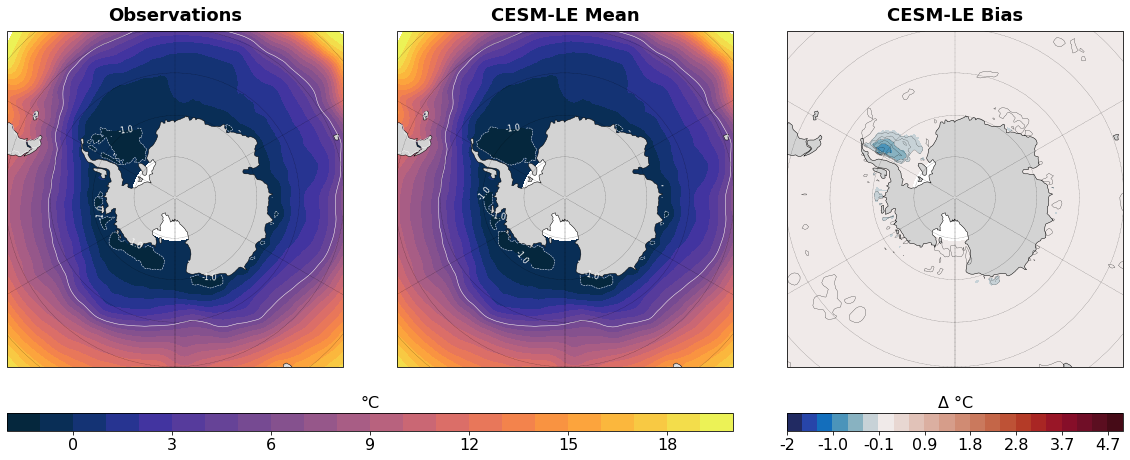

In [138]:
# Observations -- CESM-LE -- CESM-LE Bias
dsp = dsp_t
vp1 = 'dso_SST_mean'
vp2 = 'dsm_SST_mean'
vp3 = 'SST_mean_bias'
unit = '°C'
pt = 'SST-BIAS(corrected)+uncorr-levels'
########################################################
fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(2,3, height_ratios=[2,0.1])
t1, t2, t3 = 'Observations', 'CESM-LE Mean', 'CESM-LE Bias'
########################################################

ax = fig.add_subplot(gs[0, 0], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = epoch_plot(dsp[vp1],lines = True)
ax.set_title(f'{t1}', fontsize = 18, fontweight = 'bold',pad=10)
# --------------------------------------------------------
ax = fig.add_subplot(gs[0, 1], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = epoch_plot(dsp[vp2],lines = True)
ax.set_title(f'{t2}', fontsize = 18, fontweight = 'bold',pad=10)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cbax = plt.subplot(gs[1,:2]) # Place it where it should be.
cb = Colorbar(ax = cbax, mappable = cf, orientation = 'horizontal')#, ticklocation = 'top')
cb.set_label(f'{unit}', labelpad=5, fontsize = 16)
cb.ax.xaxis.set_label_position('top')
cb.ax.tick_params(labelsize=16)
########################################################
ax = fig.add_subplot(gs[0, 2], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = change_plot(dsp[vp3], lines=False)
ax.set_title(f'{t3}', fontsize = 18, fontweight = 'bold',pad=10)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cbax = plt.subplot(gs[1,2:]) # Place it where it should be.
cb = Colorbar(ax = cbax, mappable = cf, orientation = 'horizontal')#, ticklocation = 'top')
cb.set_label(f'$\Delta$ {unit}',  labelpad=5, fontsize = 16)
cb.ax.xaxis.set_label_position('top')
cb.ax.set_xticklabels(cb_labels)

cb.ax.tick_params(labelsize=16)

########################################################
ax = fig.get_axes()
gs.update(hspace=0.16, wspace= 0.16, bottom=0.4)

# --------------------------------------------------------
title = (f'{pt}')
path = 'figures/'
file = '.pdf'
plt.savefig(path + title + file, bbox_inches='tight')

## Mke 3 CHL Plot Function:

In [23]:
print('chl_mean_bias')
print(dsp_c.Chl_surf_mean_bias.min().values)
print(dsp_c.Chl_surf_mean_bias.max().values)
print(dsp_c.Chl_surf_mean_bias.mean().values)
print('chl_mean_mod')
print(dsp_c.dsm_Chl_surf_mean.min().values)
print(dsp_c.dsm_Chl_surf_mean.max().values)
print(dsp_c.dsm_Chl_surf_mean.mean().values)
print('chl_mean_obs')
print(dsp_c.dso_Chl_surf_mean.min().values)
print(dsp_c.dso_Chl_surf_mean.max().values)
print(dsp_c.dso_Chl_surf_mean.mean().values)

chl_mean_bias
-34.33490836137162
5.987840260313435
0.2835465889539192
chl_mean_mod
0.0
6.092274341402422
0.498112744707819
chl_mean_obs
0.0
34.496167822309395
0.21456615575389976


In [21]:
np.linspace(dsp_c.dsm_Chl_surf_mean.min().values, dsp_c.dsm_Chl_surf_mean.max().values, 23)

array([0.        , 0.27692156, 0.55384312, 0.83076468, 1.10768624,
       1.3846078 , 1.66152937, 1.93845093, 2.21537249, 2.49229405,
       2.76921561, 3.04613717, 3.32305873, 3.59998029, 3.87690185,
       4.15382341, 4.43074498, 4.70766654, 4.9845881 , 5.26150966,
       5.53843122, 5.81535278, 6.09227434])

In [55]:
np.linspace(-6, 0.5, 21)

array([-6.   , -5.675, -5.35 , -5.025, -4.7  , -4.375, -4.05 , -3.725,
       -3.4  , -3.075, -2.75 , -2.425, -2.1  , -1.775, -1.45 , -1.125,
       -0.8  , -0.475, -0.15 ,  0.175,  0.5  ])

In [44]:
this= np.logspace(-2,1.25,16) 
['{:f}'.format(x) for x in this]

['0.010000',
 '0.016469',
 '0.027123',
 '0.044668',
 '0.073564',
 '0.121153',
 '0.199526',
 '0.328599',
 '0.541170',
 '0.891251',
 '1.467799',
 '2.417315',
 '3.981072',
 '6.556418',
 '10.797752',
 '17.782794']

In [38]:
np.linspace(-6.5, 2, 25)

array([1.00000e-02, 1.71000e-02, 2.93000e-02, 5.01000e-02, 8.58000e-02,
       1.46800e-01, 2.51200e-01, 4.29900e-01, 7.35600e-01, 1.25890e+00,
       2.15440e+00, 3.68690e+00, 6.30960e+00, 1.07978e+01, 1.84785e+01,
       3.16228e+01])

In [139]:
# Set-Up Specifics
levels_cont = [0]
levels = np.logspace(-2,1.25,16)#(-3,.8,16) #np.logspace(-1.65,.22,11)
norm = colors.LogNorm(vmin=levels[0], vmax=levels[-1])
# test numbers: this= np.logspace(-3,.22,11) ['{:f}'.format(x) for x in this]
chl_labels = ['{:f}'.format(x) for x in levels]

#chl_labels = [0.001,0.002,0.003, 0.006, 0.01, 0.02, 0.03, 0.06, 0.11, 0.19, 0.34, 0.61, 1.1 , 1.96, 3.52, 6.31]
levels_chng = np.linspace(-2, 6, 21)#np.linspace(-6.5-, 2, 25) 
diff_labels = [-6,-5,-4,-3,-2,-1,0,1,2]


cmap = cmocean.cm.dense
cmap_chng = cmocean.cm.balance

extent = ([-180, 180, -90, -50], ccrs.PlateCarree())
prj = ccrs.SouthPolarStereo()


In [140]:
def chl_plot(da, lines=True):
    # filled contours
    cf = ax.contourf(dsp.TLONG, dsp.TLAT, da,
                     levels=levels,
                     norm=norm,
                     cmap=cmap,
                     transform=ccrs.PlateCarree())
    # contour lines
    cs = ax.contour(dsp.TLONG, dsp.TLAT, da,
                    colors='k',
                    levels=levels_cont,
                    linewidths=0.25,
                    transform=ccrs.PlateCarree())
    if lines:
        # add contour labels
        lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r')
    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                            facecolor='lightgray'))
    ax.coastlines(linewidth=0.5)
    ax.gridlines(linewidth=.25, color='black', alpha=0.7, linestyle='--').n_steps = 90  ## this makes them rounder
    return cf


In [141]:
bias_norm = MidpointNormalize(midpoint=0.)

#bias_norm=colors.SymLogNorm(linthresh=0.01, linscale=0.01,
#                               vmin=-10.0, vmax=10.0, base=10),

In [142]:
def change_plot(da, lines=True):
    # filled contours
    cf = ax.contourf(dsp.TLONG, dsp.TLAT, da,
                     levels=levels_chng,
                     norm=bias_norm,
                     cmap=cmap_chng,
                     transform=ccrs.PlateCarree())
    cs = ax.contour(dsp.TLONG, dsp.TLAT, da,
                    colors='gray', 
                    levels=levels_chng,
                    linewidths=.15,
                    transform=ccrs.PlateCarree())
    if lines:
        # add contour labels
        lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r')
   
    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                            facecolor='lightgray'))
    ax.coastlines(linewidth=0.5)
    ax.gridlines(linewidth=.25, color='black', alpha=0.7, linestyle='--').n_steps = 90  ## this makes them rounder
    return cf

/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: Log scale: values of z <= 0 have been masked
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


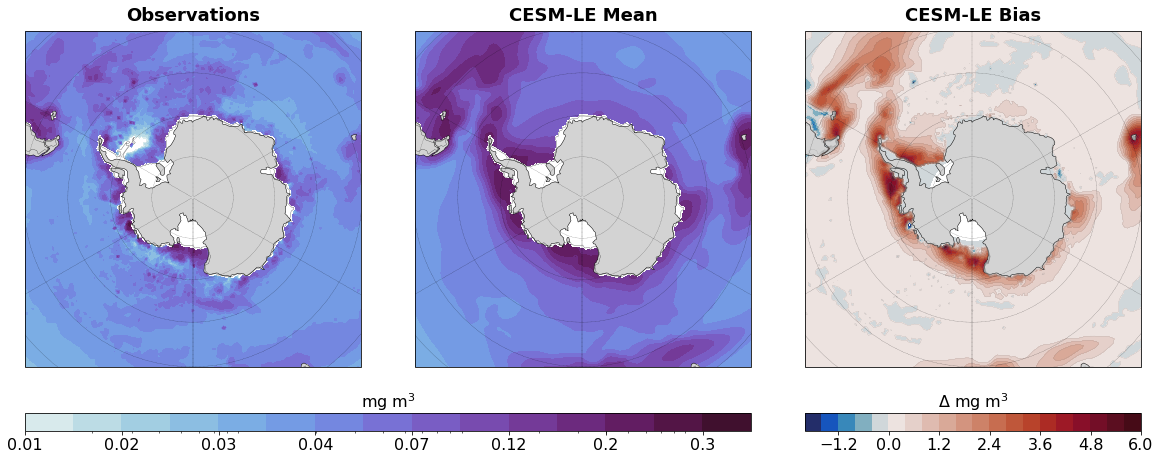

In [143]:
# Observations -- CESM-LE -- CESM-LE Bias
dsp = dsp_c
vp1 = 'dso_Chl_surf_mean'
vp2 = 'dsm_Chl_surf_mean'
vp3 = 'Chl_surf_mean_bias'
unit = 'mg m$^3$'
pt = 'Chl_surf-BIAS'
########################################################
fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(2,3, height_ratios=[2,0.1])
t1, t2, t3 = 'Observations', 'CESM-LE Mean', 'CESM-LE Bias'
########################################################

ax = fig.add_subplot(gs[0, 0], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = chl_plot(dsp[vp1],lines = False)
ax.set_title(f'{t1}', fontsize = 18, fontweight = 'bold',pad=10)
# --------------------------------------------------------
ax = fig.add_subplot(gs[0, 1], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = chl_plot(dsp[vp2],lines = False)
ax.set_title(f'{t2}', fontsize = 18, fontweight = 'bold',pad=10)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cbax = plt.subplot(gs[1,:2]) # Place it where it should be.
cb = Colorbar(ax = cbax, mappable = cf, orientation = 'horizontal')#, ticklocation = 'top')
cb.set_label(f'{unit}', labelpad=5, fontsize = 16)
cb.ax.xaxis.set_label_position('top')
cb.ax.set_xticklabels([0.01, 0.02, 0.03, 0.04, 0.07, 0.12, 0.2, 0.3])
cb.ax.tick_params(labelsize=16)
########################################################

ax = fig.add_subplot(gs[0, 2], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = change_plot(dsp[vp3], lines=False)
ax.set_title(f'{t3}', fontsize = 18, fontweight = 'bold',pad=10)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

cbax = plt.subplot(gs[1,2:]) # Place it where it should be.

cb = Colorbar(ax = cbax, mappable = cf,orientation = 'horizontal')#, ticklocation = 'top')

cb.set_label(f'$\Delta$ {unit}',  labelpad=5, fontsize = 16)
cb.ax.xaxis.set_label_position('top')
#cb.ax.set_xticklabels(diff_labels)
cb.ax.tick_params(labelsize=16)

########################################################
ax = fig.get_axes()
gs.update(hspace=0.16, wspace= 0.16, bottom=0.4)

# --------------------------------------------------------
title = (f'{pt}')
path = 'figures/'
file = '.pdf'
plt.savefig(path + title + file, bbox_inches='tight')


___
# PCOLORMESH:

In [13]:
lon, lat = ds_mod.TLONG, ds_mod.TLAT

field = chl_mod_mean - chl_obs_mean

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax.set_extent([180, -180, -90,  -50], crs=ccrs.PlateCarree())

cmap = cmocean.cm.balance

cf = ax.pcolormesh(lon, lat, field,
                 cmap=cmap,
                 norm=colors.SymLogNorm(linthresh=0.01, linscale=0.01,
                               vmin=-10.0, vmax=10.0, base=10),
                 transform=ccrs.PlateCarree())

ax.coastlines('50m')
ax.gridlines()
plt.colorbar(cf, shrink=0.75);
ax.set_title('DJF Chlorophyll bias');

NameError: name 'chl_mod_mean' is not defined